### Heart disease prediction using KNN

This project will look at the likelihood of someone have heart disease, given their current health and other factors.


<img src="https://i0.wp.com/post.healthline.com/wp-content/uploads/2020/06/485800-Heart-Disease-Facts-Statistics-and-You-1296x728-Header.png?h=1528" />

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.metrics import accuracy_score

### Importing the data

In [2]:
#Import the dataframe 
df=pd.read_csv(r"heart_disease_prediction.csv")

#Display first 5 rows
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
#Find out numbr of features and observations in dataset
s=df.shape
print("The number of features are {feat} and number of observations are {obs}".format(feat=s[1],obs=s[0]))


The number of features are 12 and number of observations are 918


### EDA : Descriptive statistics

In [4]:
# find out which columns are numerical and categorical 
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [5]:
#analysing the numerical data 

print("The average age of the patients is {age}".format(age=round(df["Age"].mean())))
print(df.describe())

The average age of the patients is 54
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


->Some insights gained is that the mean is quite high for Age,RestingBP,Cholesterol,MaxHR, so we may have to normalise the data in these features.

->Alongside this,the standard deviation is especially high for Cholesterol.

->The median for Cholesterol is greater than the mean by around 25 (a significant amount), the data for Cholesterol is most likely left skewed 

-> Minimum values for both RestingBP and Cholesterol is 0,which doesn't sound right 

In [6]:
# check to see if there is missing data

na=df.isna().sum()
na

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Luckily there is no missing data

In [7]:
def bar(feature):
    sns.catplot(x = feature, kind = "count", palette= "ch:.25", data =df )
    
    

In [8]:
feat=["ST_Slope","ExerciseAngina","Sex","ChestPainType","RestingECG","HeartDisease","FastingBS"]

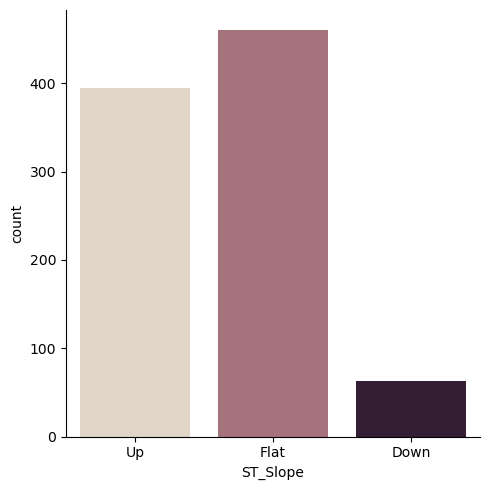

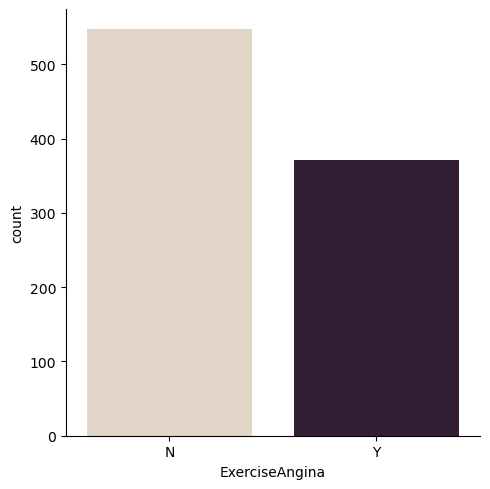

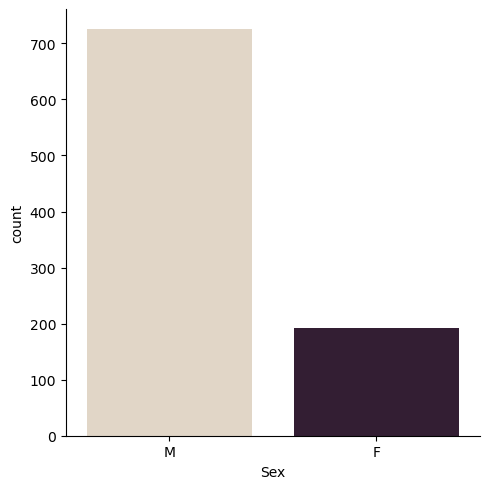

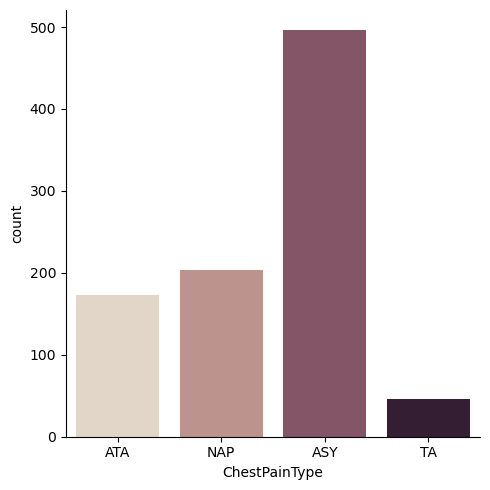

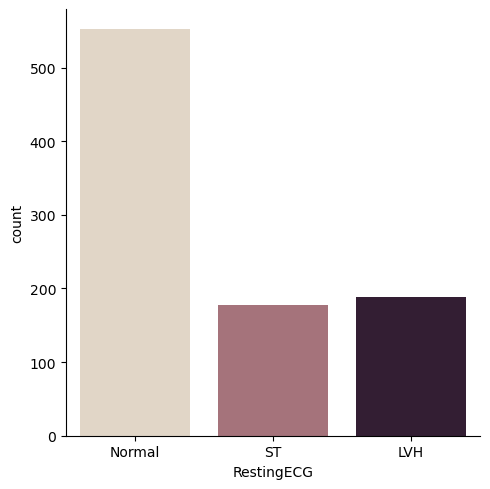

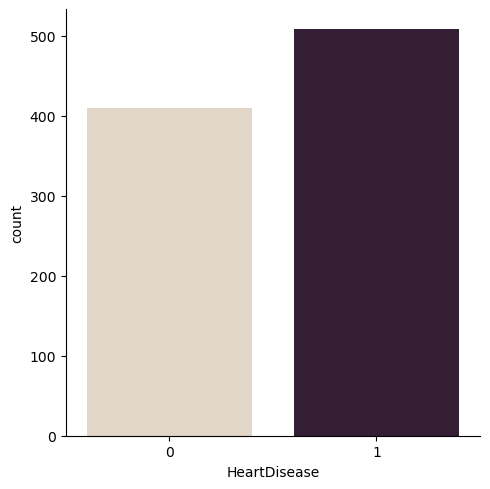

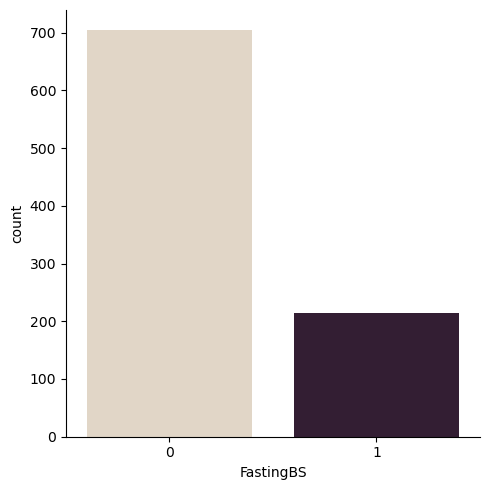

In [9]:
for feature in feat:
    bar(feature)
    plt.show()

Insights:
-> data highly skewed towards males, may include a bias when splitting the data to train and test model
-> somewhat even distribution of those that have heart disease, good for training and testing model, as unlikely to have bias 

In [10]:
n_feat=["ST_Slope","ExerciseAngina","Sex","ChestPainType","RestingECG","FastingBS",]


In [11]:
def new_bar(feature):
    df_n=df.groupby(feature)["HeartDisease"].value_counts()
    df_n.plot(kind="bar")
    plt.show()

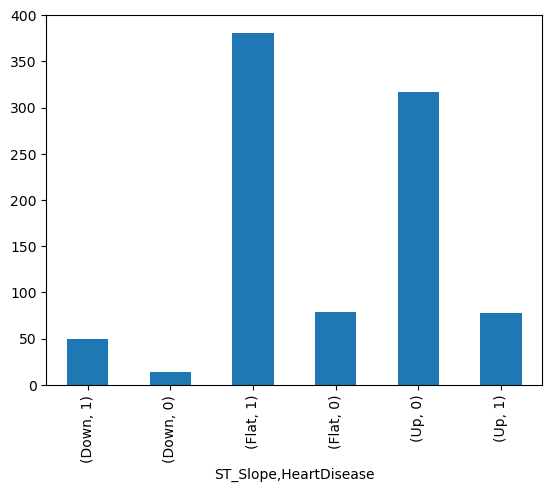

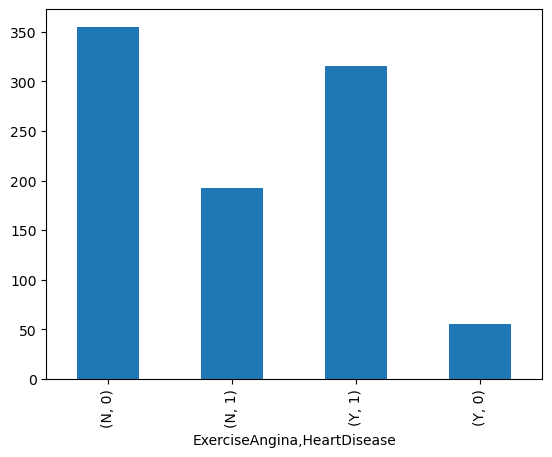

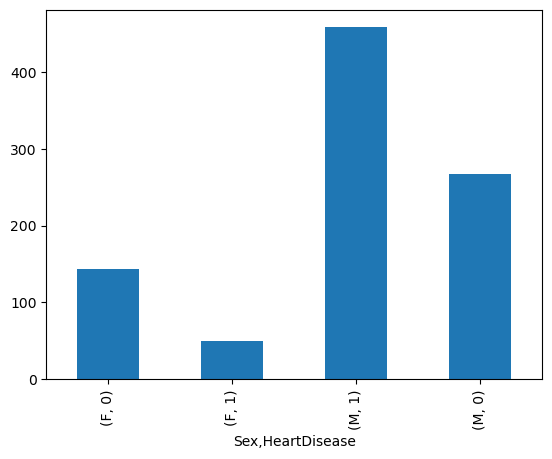

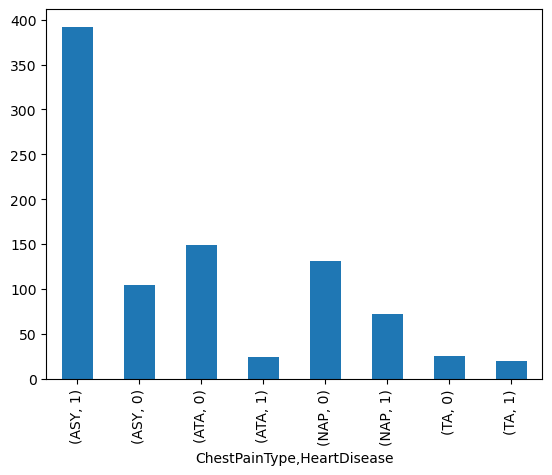

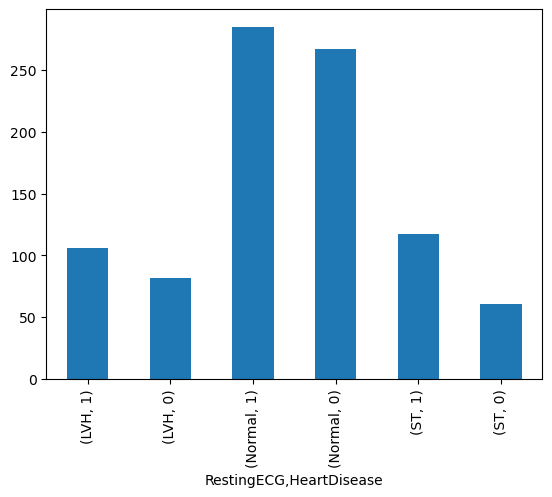

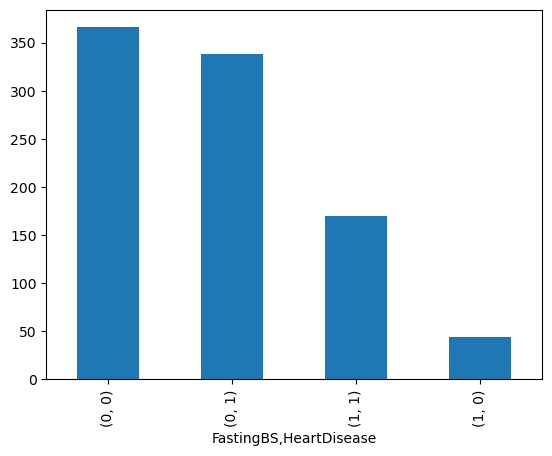

In [12]:
for feat in n_feat:
    new_bar(feat)
    plt.show()

Insights:
-> Those that had heart disease had AST chest pain 
->Large number of people with blood sugar greater than 120mg/dl were diagnosed with heart disease, however a lot more were diagnosed with heart disease who has blood sugar lower than 120mg/dl

In [13]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [14]:
#some other insights

per_50 = (df[(df["HeartDisease"] == 1) & (df["Age"] > 50) & (df["Sex"]=="M")])

perc_50 = per_50.shape[0]/df.shape[0] *100

# calculate the percentage


print(f"The percentage of patients with heart disease who are male and over 50 years old is {perc_50:.2f}%")

The percentage of patients with heart disease who are male and over 50 years old is 37.47%


There is a significant number of patients that fit this criteria, this supports the insights gained from the charts above.


In [15]:
med = df[df["HeartDisease"]==1]["Age"].median()

print(f"The median age  of patients with Heart disease is {med:.0f}")

The median age  of patients with Heart disease is 57


Further evidence to show our data is more left skewed in terms of age, supporting the idea of older patients more likely to have heart disease

### Data Cleaning 

From what we've identified before, the data from RestingBP and Cholesterol had a min value of 0, which doesn't look right.
The method I will be using will replace the 0 with the median value, given that they have heartdisease

In [16]:
#number of 0 values in RestinfBP and Cholesterol
val_bp_0=(df[df["RestingBP"]==0]).shape[0]
val_chol_0=(df[df["Cholesterol"]==0]).shape[0]

print(f"The number of 0 values in RestingBP is {val_bp_0} and the number of 0 values in Cholesterol is {val_chol_0}")

The number of 0 values in RestingBP is 1 and the number of 0 values in Cholesterol is 172


In [17]:
# Replace 0 values in RestingBP with median value of the column grouped by HeartDisease
df["RestingBP"] = df.groupby("HeartDisease")["RestingBP"].apply(lambda x: x.replace(0, x.median()))

In [18]:
# Replace 0 values in Cholesterol with median value of the column grouped by HeartDisease
df["Cholesterol"] = (df.groupby(["HeartDisease"])["Cholesterol"]).apply(lambda x: x.replace(0, x.median()))

In [19]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.540305,239.675381,0.233115,136.809368,0.887364,0.553377
std,9.432617,17.989941,54.328249,0.423046,25.460334,1.066570,0.497414
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,225.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [20]:
#As we can see the minimum values for borth RestingBP and Cholesterol are not 0
val_bp=(df[df["RestingBP"]==0]).shape[0]
val_chol=(df[df["Cholesterol"]==0]).shape[0]

print(f"The number of 0 values in RestingBP is {val_bp} and the number of 0 values in Cholesterol is {val_chol}")

The number of 0 values in RestingBP is 0 and the number of 0 values in Cholesterol is 0


### Feature selection

In [21]:
#first we need to turn categorical data into dummy variables, so it can be used to train the model
df.dtypes=="object"

Age               False
Sex                True
ChestPainType      True
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG         True
MaxHR             False
ExerciseAngina     True
Oldpeak           False
ST_Slope           True
HeartDisease      False
dtype: bool

In [22]:
conv_df=pd.get_dummies(df,drop_first = True)
conv_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


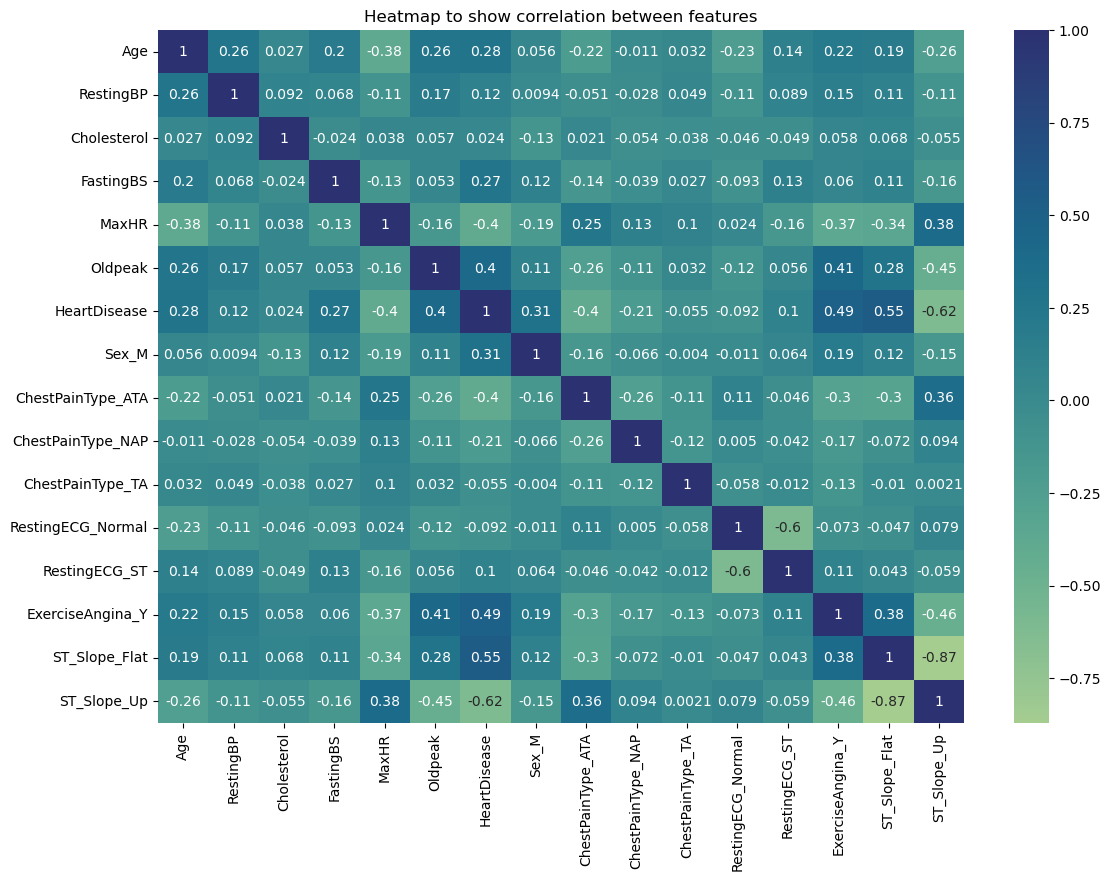

In [23]:
#Create a heatmap to see which features are correlated to HeartDisease
plt.figure(figsize=(13,9))
sns.heatmap(conv_df.corr(),annot=True,cmap="crest")
plt.title("Heatmap to show correlation between features")
plt.show()

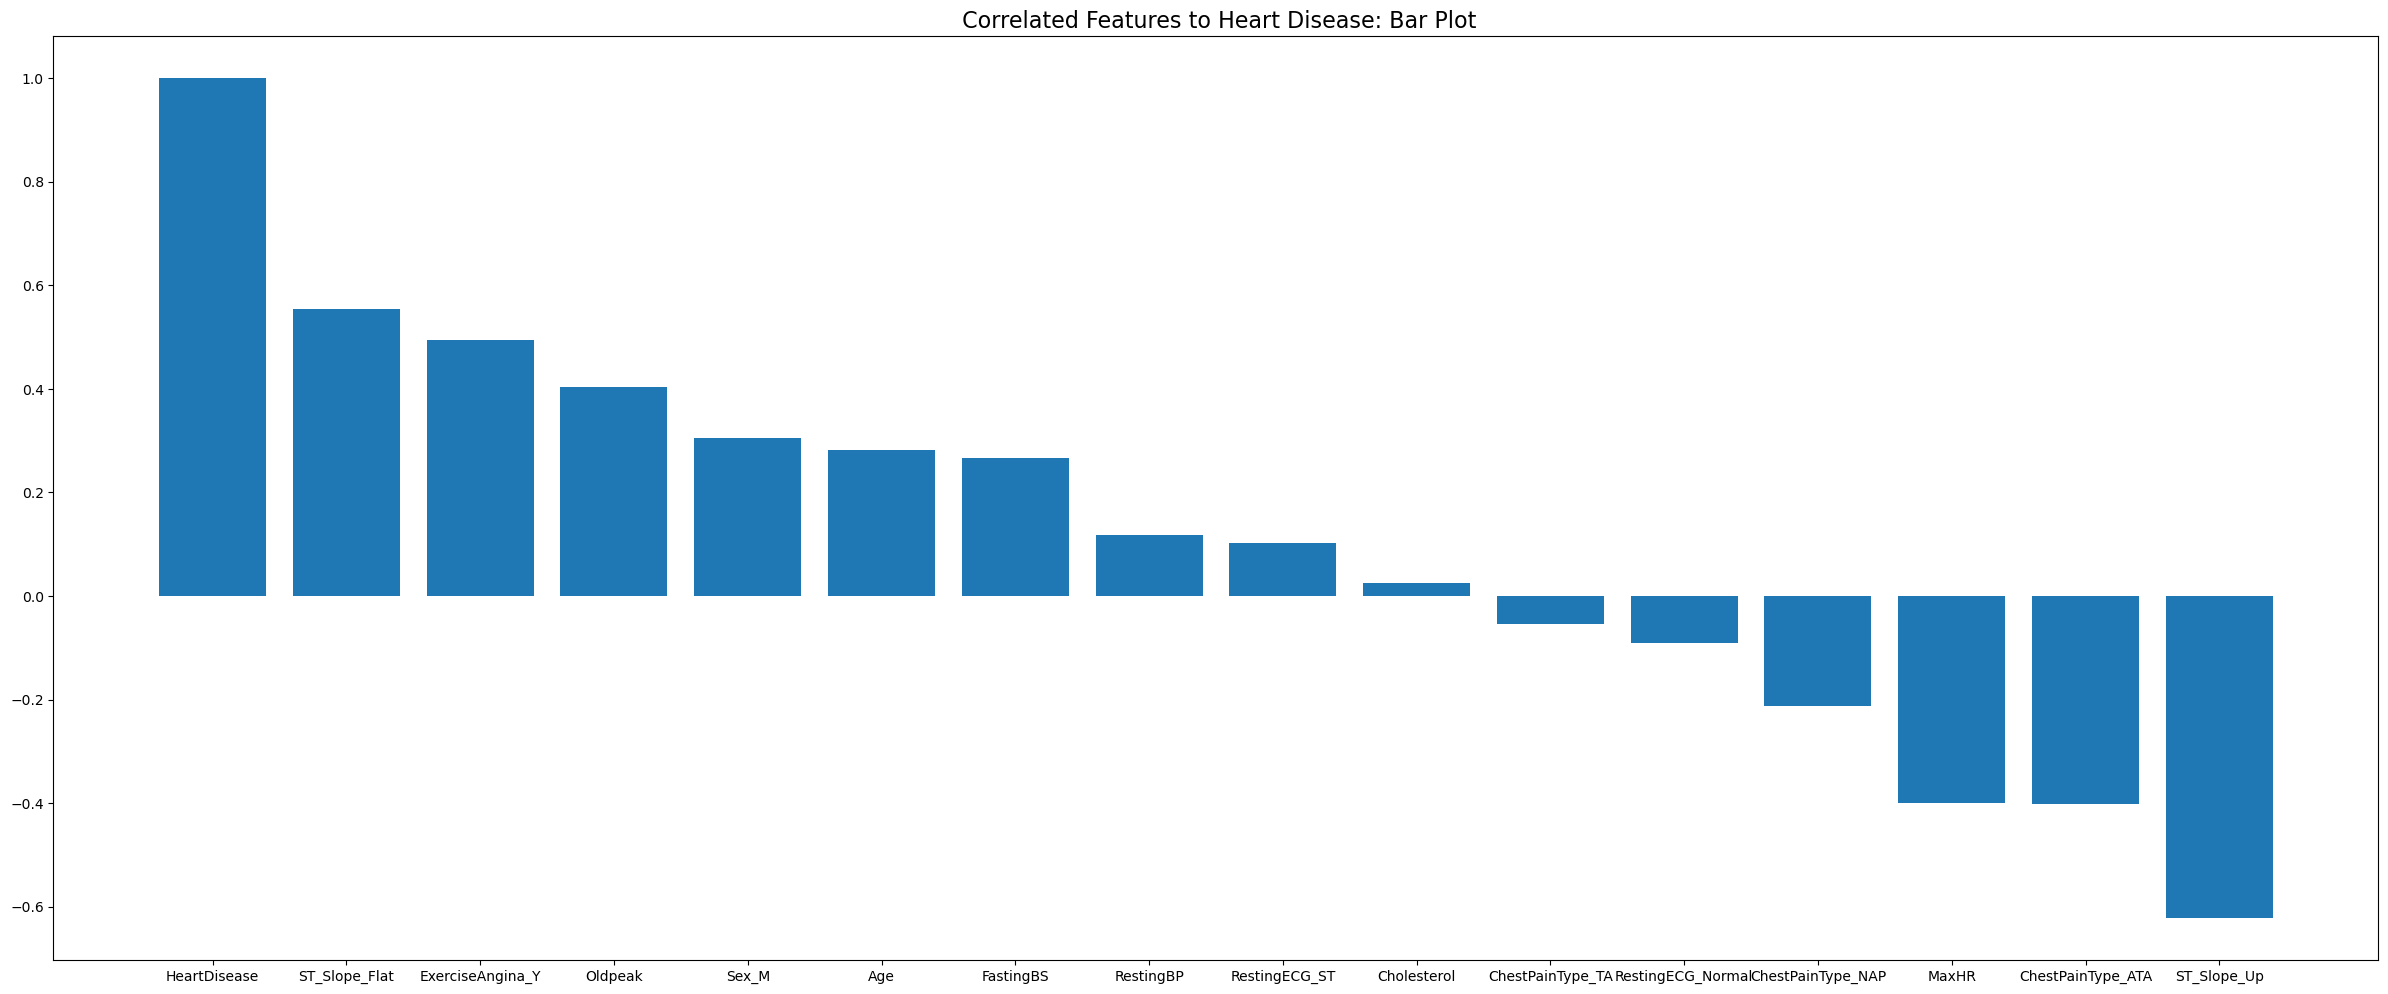

In [24]:
#find features correlated with HeartDisease specifically
d=conv_df.corr()["HeartDisease"].sort_values(ascending=False)
plt.figure(figsize=(30,12))
plt.title("Correlated Features to Heart Disease: Bar Plot", fontsize=16)
plt.bar(x=d.index, height=d)
plt.show()

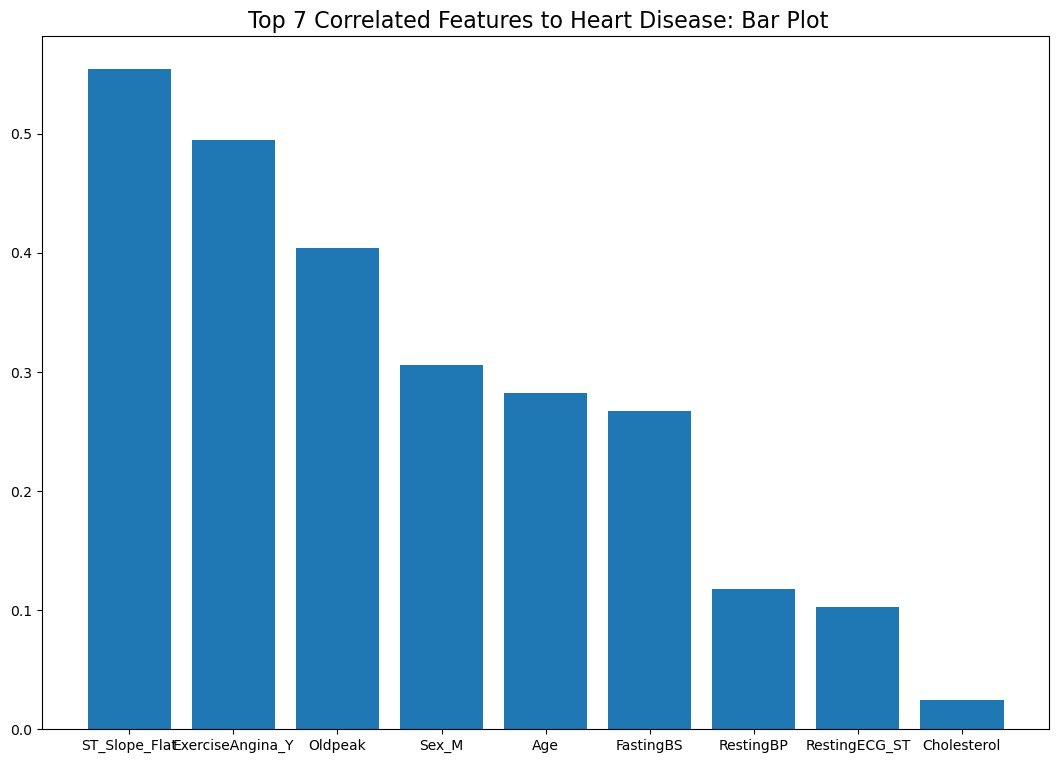

In [25]:
c=((conv_df.corr()["HeartDisease"])).sort_values(ascending=False)
plt.figure(figsize=(13,9))
plt.title("Top 7 Correlated Features to Heart Disease: Bar Plot", fontsize=16)
plt.bar(x=c.index[1:10], height=c.iloc[1:10])
plt.show()

### Do the same but this time to check negative correlation as this will indicate what features correlate with not having heart disease

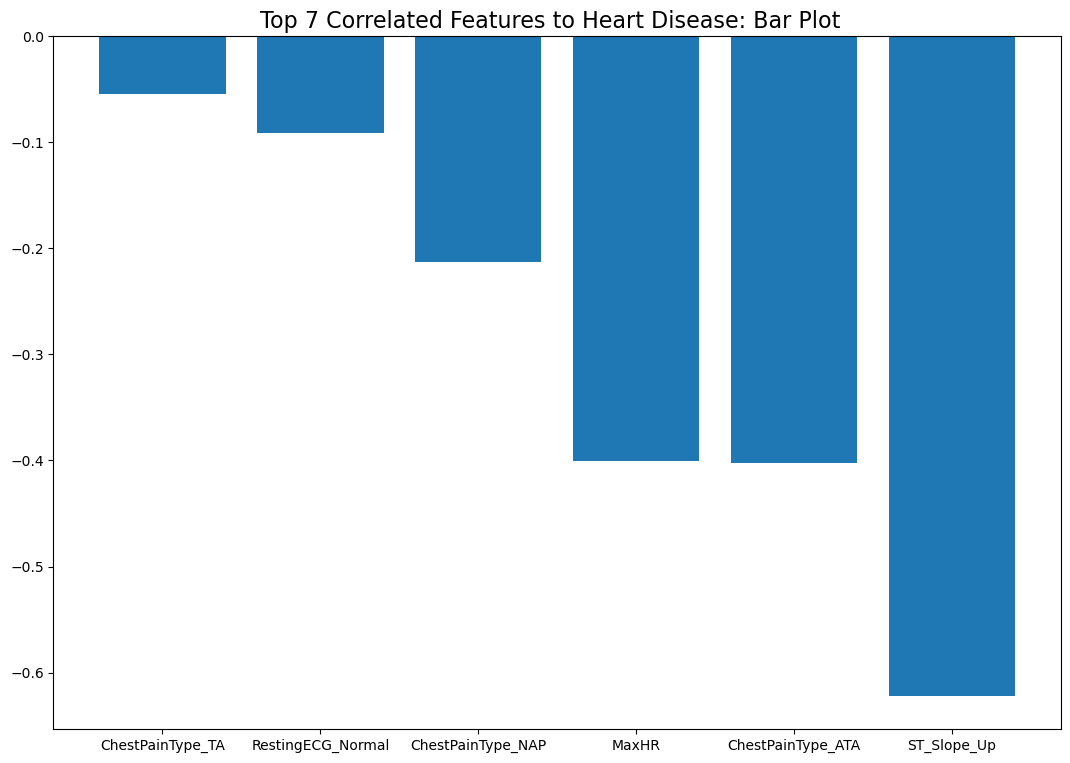

In [26]:
c=((conv_df.corr()["HeartDisease"])).sort_values(ascending=False)
plt.figure(figsize=(13,9))
plt.title("Top 7 Correlated Features to Heart Disease: Bar Plot", fontsize=16)
plt.bar(x=c.index[10:], height=c.iloc[10:])
plt.show()

From our correlation heat map and supporting bar charts, features that are positively correlated(above 0.3 or below -0.3 correlation coefficient) are :

ST_slope_Flat, 
ExcerciseAngine_Y, 
Oldpeak, 
Sex_M, 
MaxHR, 
ChestPainType_ATA, 
ST_Slope_Up


###  Creating the model and finding the best way to split the data 

Building a classifier using just 1 feature and various different ways to split the data

In [27]:
#split the data into features X and target y
X=conv_df.drop(columns="HeartDisease",axis=1)
y=conv_df["HeartDisease"]

#the list of features 
features=["ST_Slope_Up","ST_Slope_Flat","ExerciseAngina_Y","Oldpeak","ChestPainType_ATA","MaxHR","Sex_M"]

#list of percentage values
percent = [10,15,20,25,30]

results1={}

#create a for loop to loop over the percentages to split the data 
for perc in percent:
    X_train, X_val, y_train, y_val=train_test_split(X,y,test_size=perc/100,random_state=42)
    
    # Create dictionary to store results for currect test size
    test_results = {}
    
    #create a for loop applying individual features one by one and get an accuracy score
    for feat in features:
        knn=KNeighborsClassifier(n_neighbors=3)
        knn.fit(X_train[[feat]],y_train)
        
        y_pred=knn.predict(X_val[[feat]])
        
        acc=sqrt(mean_squared_error(y_val,y_pred))
        
        #add the accuracy to the test_results dict and the feature 
        test_results[feat] = round(acc, 4)
    
    #add the test_results to the results1 dict but with the corresponding percentage
    results1[perc]=test_results
    

c:\ana\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ana\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this wa

In [28]:
#creating another double for loop but this time will judge the features using the score function

results2={}
for perc in percent:
    X_train, X_val, y_train, y_val=train_test_split(X,y,test_size=perc/100,random_state=42)
    
    # Create dictionary to store results for currect test size
    test_results2 = {}
    

    for feat in features:
        knn=KNeighborsClassifier(n_neighbors=3)
        knn.fit(X_train[[feat]],y_train)
                
        accuracy = knn.score(X_val[[feat]], y_val)
        
        test_results2[feat] = round(accuracy, 4)
    
    results2[perc]=test_results2

c:\ana\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ana\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this wa

In [29]:
#creating dataframes for the results 
results1 = pd.DataFrame.from_dict(results1).style.highlight_max().set_caption("Using mean squared error to look at best features and percentage")

results2 = pd.DataFrame.from_dict(results2).style.highlight_max().set_caption("Using the score function to look at best features and percentage")

Figuring out what is the best percentage and features

In [30]:
results1

,10,15,20,25,30
ST_Slope_Up,0.454400,0.458400,0.448400,0.447200,0.637000
ST_Slope_Flat,0.642700,0.517800,0.500000,0.506500,0.637000
ExerciseAngina_Y,0.580500,0.589800,0.585100,0.652800,0.637000
Oldpeak,0.561400,0.545100,0.594400,0.618600,0.598900
ChestPainType_ATA,0.571000,0.531600,0.762600,0.535700,0.521300
MaxHR,0.580500,0.637000,0.598900,0.618600,0.595900
Sex_M,0.766100,0.770800,0.598900,0.586100,0.564700


In [31]:
results2

,10,15,20,25,30
ST_Slope_Up,0.793500,0.789900,0.798900,0.800000,0.594200
ST_Slope_Flat,0.587000,0.731900,0.750000,0.743500,0.594200
ExerciseAngina_Y,0.663000,0.652200,0.657600,0.573900,0.594200
Oldpeak,0.684800,0.702900,0.646700,0.617400,0.641300
ChestPainType_ATA,0.673900,0.717400,0.418500,0.713000,0.728300
MaxHR,0.663000,0.594200,0.641300,0.617400,0.644900
Sex_M,0.413000,0.405800,0.641300,0.656500,0.681200


I beleive the best way to measure the accuracy is the inbuilt score function that is used for KNN models, so the insights gained from results2 are more reliable.
From the 2 dataframe, ST_Slope_Up,ST_Slope_Flat  consistently performs well across most percentages.
Sex_M and ExerciseAngina_Y  are the worser features across most percentages.
However for something like HeartDisease we do want to see a higher score for the model, implying either our n_neighbours could be modified or the model should be trained with more complex inputs, such as more than 1 feature.
The most reliable percentage is 10% or 15% as it perfroms decently among all the features

In [32]:
#now we will find out the best value for n_neigbours,using the same method above, and using the score function instead of mean squared error

#creating another double for loop but this time will judge the features using the score function

k_val=[1,3,5,7,9,11]
X_train, X_val, y_train, y_val=train_test_split(X,y,test_size=0.15,random_state=42)

results3={}
for k in k_val:
    knn=KNeighborsClassifier(n_neighbors=k)
    
    # Create dictionary to store results for currect test size
    test_results3 = {}
    

    for feat in features:
        knn.fit(X_train[[feat]],y_train)
                
        accuracy = knn.score(X_val[[feat]], y_val)
        
        test_results3[feat] = round(accuracy, 4)
    
    results3[k]=test_results3


c:\ana\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ana\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this wa

In [33]:
#convert the results into a dataframe
results3 = pd.DataFrame.from_dict(results3).style.highlight_max().set_caption("Using a percentage of 15% and looking at the scores with different values for n_neighbours")
results3

,1,3,5,7,9,11
ST_Slope_Up,0.789900,0.789900,0.789900,0.789900,0.789900,0.789900
ST_Slope_Flat,0.731900,0.731900,0.731900,0.731900,0.731900,0.731900
ExerciseAngina_Y,0.652200,0.652200,0.652200,0.652200,0.594200,0.652200
Oldpeak,0.659400,0.702900,0.710100,0.702900,0.688400,0.710100
ChestPainType_ATA,0.717400,0.717400,0.717400,0.717400,0.717400,0.717400
MaxHR,0.521700,0.594200,0.681200,0.681200,0.695700,0.695700
Sex_M,0.652200,0.405800,0.652200,0.652200,0.652200,0.652200


Evidently the accuracy of our model changes with the n_neighbours value for some features, however it is not that significant for most features, so going forward the value of n_neighbours will be 7.

From what we have seen the features are the more important factor to the accuracy of the model, so now that the parameters of the model have been found we can start looking at the features

Building a classifier using multiple features

Parameters chosen is:

test_size = 0.15

n_neighbours = 7 

Before we do this we need to normalise the data, as the KNN model is a distance based model, meaning large values will negatively effect the model.

## Building the final model 

In [34]:
#split the data
X_train, X_val, y_train, y_val = train_test_split(X[features], y,
                                                  test_size=0.15,
                                                  random_state=42)
#create the model
scaler = MinMaxScaler()

#normalise the training data
X_train_scaled=scaler.fit_transform(X_train)

#normalise the testing data
X_val_scaled=scaler.transform(X_val)

#now fit the normalises data on the KNN model and then check the accuracy 
knn=KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train_scaled,y_train)

#finding out the accuracy using score
ac = knn.score(X_val_scaled, y_val)

print(f"The model accuracy is {ac*100:.2f} %")

The model accuracy is 80.43 %


c:\ana\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Using all the features the score has increased from  78.99% when using just one feature("ST_Slope_Up")which was the highest score we got. The score increased by a small amount, implying that some features have more importance on HeartDisease than others,and may negatively effect our model.
Going forward we can improve the model even further using other parameters,
and we can apply GridSearchCV to find the most optimal parameters

## HyperParameter tuning

Using the GridSearchCV method to find the best parameters for the model parameters

In [35]:
X = conv_df.drop(columns="HeartDisease", axis=1)
y = conv_df["HeartDisease"]

features=["ST_Slope_Up","ST_Slope_Flat","ExerciseAngina_Y","Oldpeak","ChestPainType_ATA","MaxHR","Sex_M"]

#split the dataset
X_train, X_val, y_train, y_val = train_test_split(X[features], y,
                                                  test_size=0.15,
                                                  random_state=42)
#scaling the training set 
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

In [36]:
#create a grid of featres
param_grid ={"n_neighbors":list(range(1,25)),
            "weights":["uniform","distance"],
            "metric":["minkowski", "manhattan"]}

#instanitiate the knn model
knn = KNeighborsClassifier()

#create a GridSearchCV
knn_grid=GridSearchCV(estimator=knn,param_grid=param_grid,scoring="accuracy")

#fit the Grid to the training data
knn_grid.fit(X_train_scaled,y_train)


c:\ana\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ana\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this wa

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [37]:
#from the Grid we want to get the best scores and parameters 
best_score = knn_grid.best_score_
best_params=knn_grid.best_params_

print(f"The best parameters are {best_params} and the corresponding best score is {best_score*100:.2f} %")

The best parameters are {'metric': 'manhattan', 'n_neighbors': 23, 'weights': 'uniform'} and the corresponding best score is 85.38 %


Evidently there is an increase in the accuracy after we have used hyperparameter tuning,
and we can now apply these best paramaters directly to our model. 

In [38]:
#scale the testing features
X_val_scaled = scaler.fit_transform(X_val)

#predict models output on testing features using the best parameters
best_model = knn_grid.best_estimator_

X_pred= best_model.predict(X_val)

#the accuracy of the model's prediction using accuracy_score, where the data must match for it to be given a score
#so in the case of a classification problem it's very useful 

acc= accuracy_score(y_val,X_pred)

print(f"Accuracy using the best parameters is {acc*100:.2f} %")

Accuracy using the best parameters is 79.71 %


c:\ana\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\ana\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


After testing our data on the testing data (val) we actually get a lower score,
this can indicate that our data is overfit and suits the training data more heavily meaning it can't be put into production yet. One factore we haven't looked at is the random_state when we are splitting the data, so will have a look at that now. 

In [39]:
#random states, these are the most commonly used ones 
random_states=[0, 415, 417, 419, 2023]

#create a for loop to try out the different values for the random_states

results={}
for r in random_states:
    #split the data
    X_train, _, y_train, _ = train_test_split(X[features], y,
                                                  test_size=0.15,
                                                  random_state=r)
    #scale the data
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    
    #fit the data to the model 
    knn = KNeighborsClassifier()
    
    #using the grid method to find the most optimal parameters along random_state
    param_grid ={"n_neighbors":list(range(1,25)),
            "weights":["uniform","distance"],
            "metric":["minkowski", "manhattan"]}
    
    knn_grid=GridSearchCV(estimator=knn,param_grid=param_grid,scoring="accuracy")
    
    #fit the data to the grid 
    knn_grid.fit(X_train_scaled,y_train)
    
    #locate the best params and score
    best_score = knn_grid.best_score_
    best_params=knn_grid.best_params_
    
    #present the findings
    results[f"random_state {r}"]={"Best_Score":round(best_score*100,2),
                                 "best_params":best_params}

c:\ana\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ana\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this wa

In [40]:
pd.DataFrame.from_dict(results)

,random_state 0,random_state 415,random_state 417,random_state 419,random_state 2023
Best_Score,85.0,84.62,84.1,84.62,83.85
best_params,"{'metric': 'minkowski', 'n_neighbors': 20, 'we...","{'metric': 'minkowski', 'n_neighbors': 20, 'we...","{'metric': 'minkowski', 'n_neighbors': 18, 'we...","{'metric': 'manhattan', 'n_neighbors': 17, 'we...","{'metric': 'minkowski', 'n_neighbors': 15, 'we..."


From this we have identified that a random_state of 0 ,'metric': 'minkowski', 'n_neighbors': 20 and weight = uniform is the most optimal parameters

## Building final model with the most optimal parameters 

In [41]:
#split data into target and features 
X_train, X_test, y_train, y_test = train_test_split(X[features], y,
                                                    test_size=0.15,
                                                    random_state=0)

#split date into testing and training data
scaler = MinMaxScaler()

#standardise the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#create the model 
knn = KNeighborsClassifier(n_neighbors=20, weights="uniform", metric="minkowski")

#fit data onto model
knn.fit(X_train_scaled, y_train)

#get predictions using the testing data
predictions = knn.predict(X_test_scaled)

#figure out the accuracy of the model on the testing data
accuracy = accuracy_score(y_test, predictions)
print(f"Model accuracy on test set: {accuracy*100:.2f}%")

Model accuracy on test set: 81.88%


c:\ana\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Overall it is a slight increase from before (80.43 %), this is a relatively good result, however to ensure the model is viable in production it must be test and trained on multiple other datasets.

Conclusions

Pros:

-> Can identify a heart disease before it is actually present in a patient, and can therefore prevent any complications that are involved in having a heart disease

->Automated process and only gets better when there is more data, so in a fast pace environment like the healthcare industry it will both save time and reduce the amount of time needed to spend optimising the model as it can do it itself

Cons:

-> As the model is not 100% accurate may misdiagnose someone who may not develop heart disease in the future, and the oppostite is true, someone who may get heart disease may be misdiagnosed as well

-> The model gets better with data, but it depends on the different healthcare branches to obtain the data, then clean and sort the data ready to be put into the model

-> Over time new scientific studies may show certain features don't effect heart disease, or some features that we dont have may cause heart disease, in that case the model we have now is outdated and will need hands on work from someone else to optimise the model again, which may be unlikely at a healthcare clinic 

Overall the model is a reliable way to see if someone may be at the risk of developing heart disease

#### Deploying the model 

In [42]:
import pickle

In [43]:
pickle.dump(knn, open("Model1.pkl","wb"))